<a href="https://colab.research.google.com/github/Aathityan-K/Final_Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary packages**

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Reading the dataset**

In [44]:
data = pd.read_csv("/content/drive/MyDrive/item_demand_train.csv")

In [45]:
print(data.shape)
data.head()

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# **Getting information of the dataset**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [47]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [48]:
data['date'] = pd.to_datetime(data['date'])

In [49]:
df = data.copy()

In [50]:
df['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

In [51]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

# Drop store column and grouping the data with respect to item and date 

In [52]:
df = df.groupby(['item','date'],as_index=False)['sales'].agg({"sales":"sum"})


In [53]:
df.head()

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149


In [54]:
df.tail()

,item,date,sales
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612
91299,50,2017-12-31,626


In [55]:
duplicate = df[df.duplicated()]
duplicate

,item,date,sales


In [56]:
df1 = df.copy()

# **Creating rolling window of 90days**

In [57]:
for i in range(1,51):
  df1.loc[df1['item'].isin([i]),'rolling_sales'] = df1.loc[df1['item'].isin([i]),'sales'].rolling(90,center=True,min_periods=1).sum().fillna(0)

In [58]:
df1.head()

,item,date,sales,rolling_sales
0,1,2013-01-01,133,5712.0
1,1,2013-01-02,99,5832.0
2,1,2013-01-03,127,5986.0
3,1,2013-01-04,145,6165.0
4,1,2013-01-05,149,6272.0


In [59]:
df1.tail()

,item,date,sales,rolling_sales
91295,50,2017-12-27,511,31899.0
91296,50,2017-12-28,587,31002.0
91297,50,2017-12-29,596,30365.0
91298,50,2017-12-30,612,29664.0
91299,50,2017-12-31,626,28936.0


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item           91300 non-null  int64         
 1   date           91300 non-null  datetime64[ns]
 2   sales          91300 non-null  int64         
 3   rolling_sales  91300 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.8 MB


In [61]:
df1['rolling_sales'] = df1['rolling_sales'].astype(int)
df1.drop(['sales'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item           91300 non-null  int64         
 1   date           91300 non-null  datetime64[ns]
 2   rolling_sales  91300 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 MB


In [62]:
df1.isna().sum()

item             0
date             0
rolling_sales    0
dtype: int64

# **Creating more possible features using datetime function**

In [63]:
df1['month'] = pd.DatetimeIndex(df['date']).month.astype(int)
df1['year'] = pd.DatetimeIndex(df['date']).year
df1['Date'] = pd.DatetimeIndex(df['date']).strftime('%d').astype(int)
df1['ordinal_day'] = pd.DatetimeIndex(df['date']).dayofyear
df1['ordinal_week'] = pd.DatetimeIndex(df['date']).weekofyear
df1['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek
df1['quarter'] = pd.DatetimeIndex(df['date']).quarter
df1['month_start'] = pd.DatetimeIndex(df['date']).is_month_start.astype(int)
df1['month_end'] = pd.DatetimeIndex(df['date']).is_month_end.astype(int)
df1['quarter_start'] = pd.DatetimeIndex(df['date']).is_quarter_start.astype(int)
df1['quarter_end'] = pd.DatetimeIndex(df['date']).is_quarter_end.astype(int)
df1['year_start'] = pd.DatetimeIndex(df['date']).is_year_start.astype(int)
df1['year_end'] = pd.DatetimeIndex(df['date']).is_year_end.astype(int)
df1['leap_year'] = pd.DatetimeIndex(df['date']).is_leap_year.astype(int)

<ipython-input-63-26bb4ca37ed2>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item           91300 non-null  int64         
 1   date           91300 non-null  datetime64[ns]
 2   rolling_sales  91300 non-null  int64         
 3   month          91300 non-null  int64         
 4   year           91300 non-null  int64         
 5   Date           91300 non-null  int64         
 6   ordinal_day    91300 non-null  int64         
 7   ordinal_week   91300 non-null  int64         
 8   day_of_week    91300 non-null  int64         
 9   quarter        91300 non-null  int64         
 10  month_start    91300 non-null  int64         
 11  month_end      91300 non-null  int64         
 12  quarter_start  91300 non-null  int64         
 13  quarter_end    91300 non-null  int64         
 14  year_start     91300 non-null  int64         
 15  year_end       9130

In [65]:
df1.head()

,item,date,rolling_sales,month,year,Date,ordinal_day,ordinal_week,day_of_week,quarter,month_start,month_end,quarter_start,quarter_end,year_start,year_end,leap_year
0,1,2013-01-01,5712,1,2013,1,1,1,1,1,1,0,1,0,1,0,0
1,1,2013-01-02,5832,1,2013,2,2,1,2,1,0,0,0,0,0,0,0
2,1,2013-01-03,5986,1,2013,3,3,1,3,1,0,0,0,0,0,0,0
3,1,2013-01-04,6165,1,2013,4,4,1,4,1,0,0,0,0,0,0,0
4,1,2013-01-05,6272,1,2013,5,5,1,5,1,0,0,0,0,0,0,0


In [66]:
df1.columns

Index(['item', 'date', 'rolling_sales', 'month', 'year', 'Date', 'ordinal_day',
       'ordinal_week', 'day_of_week', 'quarter', 'month_start', 'month_end',
       'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year'],
      dtype='object')

# **EDA**

In [67]:
dl = df1.groupby('month')['rolling_sales'].sum()
fig=px.bar(dl, y="rolling_sales")
fig

In [68]:
dl = df1.groupby("year")['rolling_sales'].sum()
fig1=px.bar(dl, y="rolling_sales")
fig1

**Check Correlation**

In [69]:
corr = df1.corr()
corr

,item,rolling_sales,month,year,Date,ordinal_day,ordinal_week,day_of_week,quarter,month_start,month_end,quarter_start,quarter_end,year_start,year_end,leap_year
item,1.000000e+00,-0.066677,-1.021126e-14,-6.211396e-12,4.837608e-16,4.901280e-15,-1.396453e-15,4.921071e-15,-8.076171e-15,-4.088658e-16,-2.004056e-16,1.882294e-16,-1.196922e-16,-3.364429e-16,2.165176e-16,-8.609498e-16
rolling_sales,-6.667677e-02,1.000000,9.232324e-02,2.152423e-01,4.688389e-03,9.130642e-02,9.115696e-02,5.843580e-04,9.432907e-02,-1.502608e-03,-2.251041e-04,-3.719969e-03,-1.471666e-03,-3.561704e-02,-3.081128e-02,9.913269e-02
month,-1.021126e-14,0.092323,1.000000e+00,-5.080291e-04,1.079604e-02,9.965009e-01,9.692253e-01,-1.475063e-03,9.713853e-01,-1.258675e-03,-1.258675e-03,-3.123419e-02,2.979698e-02,-8.392934e-02,8.321370e-02,-1.435549e-03
year,-6.211396e-12,0.215242,-5.080291e-04,1.000000e+00,5.841665e-04,6.719189e-04,4.664350e-03,2.711688e-03,-5.231230e-04,-7.138780e-05,-7.138780e-05,-4.075678e-05,-4.075678e-05,-2.029429e-05,-2.029429e-05,3.538920e-01
Date,4.837608e-16,0.004688,1.079604e-02,5.841665e-04,1.000000e+00,9.404329e-02,6.626610e-02,7.725204e-04,1.252828e-02,-3.085101e-01,3.080428e-01,-1.761348e-01,1.766654e-01,-8.770396e-02,9.094561e-02,1.650692e-03
ordinal_day,4.901280e-15,0.091306,9.965009e-01,6.719189e-04,9.404329e-02,1.000000e+00,9.705337e-01,-1.414220e-03,9.682308e-01,-2.698399e-02,2.447718e-02,-4.586735e-02,4.426980e-02,-9.051080e-02,9.051058e-02,1.898655e-03
ordinal_week,-1.396453e-15,0.091157,9.692253e-01,4.664350e-03,6.626610e-02,9.705337e-01,1.000000e+00,-1.397624e-03,9.452676e-01,-5.289715e-03,3.481199e-03,-8.842679e-03,8.275973e-03,-1.745003e-02,1.803764e-02,1.063400e-03
day_of_week,4.921071e-15,0.000584,-1.475063e-03,2.711688e-03,7.725204e-04,-1.414220e-03,-1.397624e-03,1.000000e+00,-1.109940e-03,2.921641e-03,5.994749e-03,-7.981732e-03,-7.981732e-03,5.198722e-03,1.044050e-02,1.641252e-03
quarter,-8.076171e-15,0.094329,9.713853e-01,-5.231230e-04,1.252828e-02,9.682308e-01,9.452676e-01,-1.109940e-03,1.000000e+00,-1.445902e-03,-1.445902e-03,-8.254952e-04,-8.254952e-04,-7.077666e-02,6.995458e-02,-1.478200e-03
month_start,-4.088658e-16,-0.001503,-1.258675e-03,-7.138780e-05,-3.085101e-01,-2.698399e-02,-5.289715e-03,2.921641e-03,-1.445902e-03,1.000000e+00,-3.397508e-02,5.709208e-01,-1.939708e-02,2.842823e-01,-9.658514e-03,-2.017220e-04


In [70]:
# Create a Plotly heatmap figure using annotated_heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values, # Correlation matrix values
    x=list(corr.columns), # X-axis labels
    y=list(corr.index), # Y-axis labels
    colorscale='Viridis', # Color scale
    showscale=True, # Display the color scale
    annotation_text=corr.round(2).values, # Round to 2 decimal places
    font_colors=['white', 'black'], # Font color scheme
)

# Set the figure layout
fig.update_layout(
    title='Correlation Heatmap'
)

# Show the plot
fig.show()


In [71]:
x = df1.groupby(['item'],as_index=False).agg({"rolling_sales":"sum"}).sort_values(by="rolling_sales",ascending=False)
trace = go.Bar(
    x=x['item'],
    y=x['rolling_sales'],
)
# Create the Plotly layout
layout = go.Layout(
    title='Sales by Item',
    xaxis=dict(title='Item'),
    yaxis=dict(title='Sales'),
)

# Create the Plotly figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

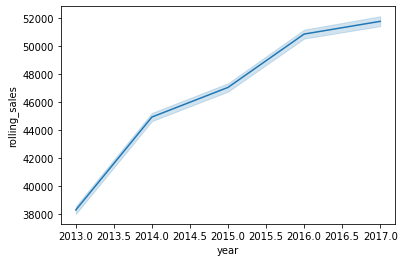

In [72]:
sns.lineplot(x='year',y='rolling_sales',data=df1)
plt.show()

In [73]:
# Create the Plotly scatter trace
trace = go.Scatter(
    x=df1['date'], # X-axis values
    y=df1['rolling_sales'], # Y-axis values
    mode='markers', # Set the marker style to 'markers'
    marker=dict(size=10), # Set the size of the markers
)

# Create the Plotly layout
layout = go.Layout(
    title='Sales by Date and Item',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Sales'),
)

# Create the Plotly figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

**From the EDA performed we can see that the sales is constantly rising and July is the best month for the sales. We can also see that item 15 is the popular product.**

# **Splitting data for training and testing**

In [74]:
X = df1.loc[:,['item', 'month', 'year', 'Date', 'ordinal_day',
       'ordinal_week', 'day_of_week', 'quarter', 'month_start', 'month_end',
       'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year']]
print(X)

       item  month  year  Date  ordinal_day  ordinal_week  day_of_week  \
0         1      1  2013     1            1             1            1   
1         1      1  2013     2            2             1            2   
2         1      1  2013     3            3             1            3   
3         1      1  2013     4            4             1            4   
4         1      1  2013     5            5             1            5   
...     ...    ...   ...   ...          ...           ...          ...   
91295    50     12  2017    27          361            52            2   
91296    50     12  2017    28          362            52            3   
91297    50     12  2017    29          363            52            4   
91298    50     12  2017    30          364            52            5   
91299    50     12  2017    31          365            52            6   

       quarter  month_start  month_end  quarter_start  quarter_end  \
0            1            1          0   

In [75]:
y = df1.loc[:,['rolling_sales']]
print(y)

       rolling_sales
0               5712
1               5832
2               5986
3               6165
4               6272
...              ...
91295          31899
91296          31002
91297          30365
91298          29664
91299          28936

[91300 rows x 1 columns]


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

# **Linear Regression**

In [77]:
 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
import sklearn.metrics as metrics
y_pred = reg.predict(X_test)
lr_r2 = metrics.r2_score(y_test, y_pred)
print(lr_r2)

0.10900378079634188


# **Decision Tree**

In [78]:
#Decision tree
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [79]:
from sklearn.metrics import r2_score
y_pred = dt_reg.predict(X_test)
dt_r2 = r2_score(y_test,y_pred)
print(dt_r2)

0.9997332708559324


# **KNN**

In [80]:
#knn
from sklearn import preprocessing, neighbors
k_possible = [1,2,3,4,11,12,13,14,21]
r2 = []
for k in k_possible:
  knn_reg = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
  knn_reg.fit(X_train,y_train)
  y_pred = knn_reg.predict(X_test)
  r2.append(r2_score(y_test,y_pred))
print(r2)

[-0.8747036902763785, -0.306831381012449, -0.12332290489030662, 0.004191030680320673, 0.21854446256954518, 0.25913749609394077, 0.2817187353517936, 0.29044723787945115, 0.2686483792298696]


# **XGBoost**

In [81]:

import xgboost as xgb
import random
import math
import sklearn.metrics
from sklearn.metrics import r2_score


In [82]:
xbg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.8,gamma=0, subsample=random.uniform(0.9,1),colsample_bytree=1, max_depth=5, seed=0)

In [83]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score1 = r2_score(y_test, y_pred)
score1

0.9983107120322454

**From the algorithms used, we can see that Decision Tree gives the best fit value**